<a href="https://colab.research.google.com/github/satyajeetkr7/Sparks-foundation-task/blob/main/Task1_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP - The Spark Foundation
Data Science & Bussiness Analytics Inten
Name - Kumar Satyajeet 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import model_selection
from sklearn import linear_model

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

<function matplotlib.pyplot.show>

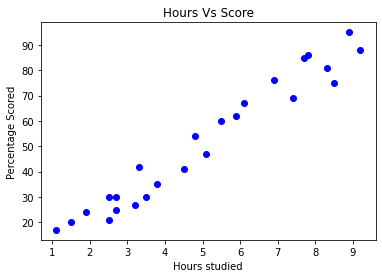

In [ ]:
plt.scatter(data['Hours'], data['Scores'], color='Blue',marker='o')
plt.title('Hours Vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


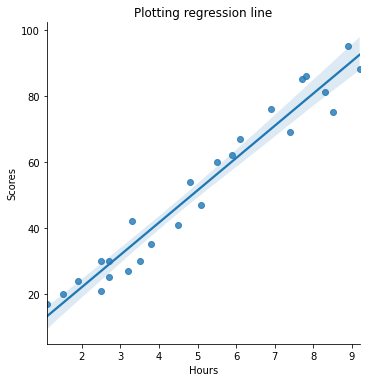

In [ ]:
sns.lmplot(x='Hours', y='Scores', data = data)
plt.title('Plotting regression line')
plt.show()

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test)


In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
data1 = pd.DataFrame({'Actual' : y_test, 'Predicted' :  y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


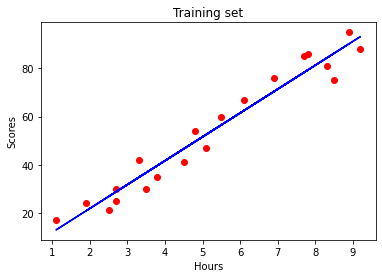

In [ ]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title(('Training set'))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

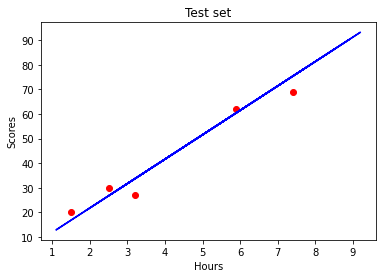

In [ ]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title(('Test set'))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

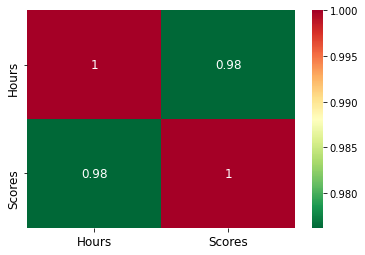

In [ ]:
plt.figure()
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn_r',annot_kws={'fontsize' : 12})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

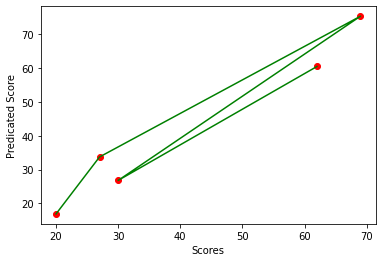

In [ ]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test, y_pred, c = 'g')
plt.xlabel('Scores')
plt.ylabel('Predicated Score')
plt.show()

What will be the predicated score if a student studies for 9.25 hrs/days?

In [ ]:
#Prediction
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No. of Hours = {}". format(Hours))
print("Predicated Score = {}". format(predict[0]))

No. of Hours = [[9.25]]
Predicated Score = 93.69173248737539


In [ ]:
#Accuracy
print("Train :", regressor.score(x_train, y_train)*100)
print("Test :", regressor.score(x_test,y_test)*100 )

Train : 95.15510725211553
Test : 94.54906892105353


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(x_test)))
print('r^2 score error', r2_score(y_test, regressor.predict(x_test)))
print('Mean square error: ', mean_squared_error(y_test, regressor.predict(x_test)))

Mean absolute error: 4.183859899002982
r^2 score error 0.9454906892105354
Mean square error:  21.598769307217456
